In [9]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_error_bars(labels, avg, sd, title="Error Bar Chart", xlabel="Labels", ylabel="Values"):
    """
    Generates a chart with error bars representing 1 standard deviation.

    Args:
        labels (list of str): The labels for each slot in the chart.
        avg (list of float): The average values for each label.
        sd (list of float): The standard deviation values for each label.
        title (str): Title of the chart. Default is "Error Bar Chart".
        xlabel (str): Label for the x-axis. Default is "Labels".
        ylabel (str): Label for the y-axis. Default is "Values".
    """
    # Convert data to NumPy arrays for flexibility
    x = np.arange(len(labels))  # Positions for labels
    avg = np.array(avg)
    sd = np.array(sd)

    # Plot the error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(x, avg, yerr=sd, fmt='o', capsize=5, label='Mean ± 1 SD', color='blue')
    
    # Add labels and formatting
    plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
input_file = os.path.join("results", "eval_losses_sourcetexts_chunksize.pkl")
with open(input_file, 'rb') as file:
    eval_losses = pickle.load(file)

final_labels   = []
final_loss_avg = []
final_loss_sd  = []
final_acc_avg  = []
final_acc_sd   = []

for data_split, losses in eval_losses.items():
    print(f"Data split: {data_split}")
    ls = np.zeros(10)
    ac = np.zeros(10)
    for i, (loss, acc) in enumerate(losses):
        ls[i] = loss
        ac[i] = acc
    
    avg_loss = ls.mean()
    sd_loss = ls.std()
    avg_acc = ac.mean()
    sd_acc = ac.std()

    print(f"Average loss: {avg_loss:.3f} ± {sd_loss:.3f}")
    print(f"Average acc:  {avg_acc:.3f} ± {sd_acc:.3f}\n")

    final_labels.append(data_split)
    final_loss_avg.append(avg_loss)
    final_loss_sd.append(sd_loss)
    final_acc_avg.append(avg_acc)
    final_acc_sd.append(sd_acc)

Data split: 2000
Average loss: 2.416 ± 0.253
Average acc:  0.321 ± 0.033

Data split: 5000
Average loss: 1.813 ± 0.105
Average acc:  0.386 ± 0.037

Data split: 8000
Average loss: 1.935 ± 0.052
Average acc:  0.260 ± 0.073



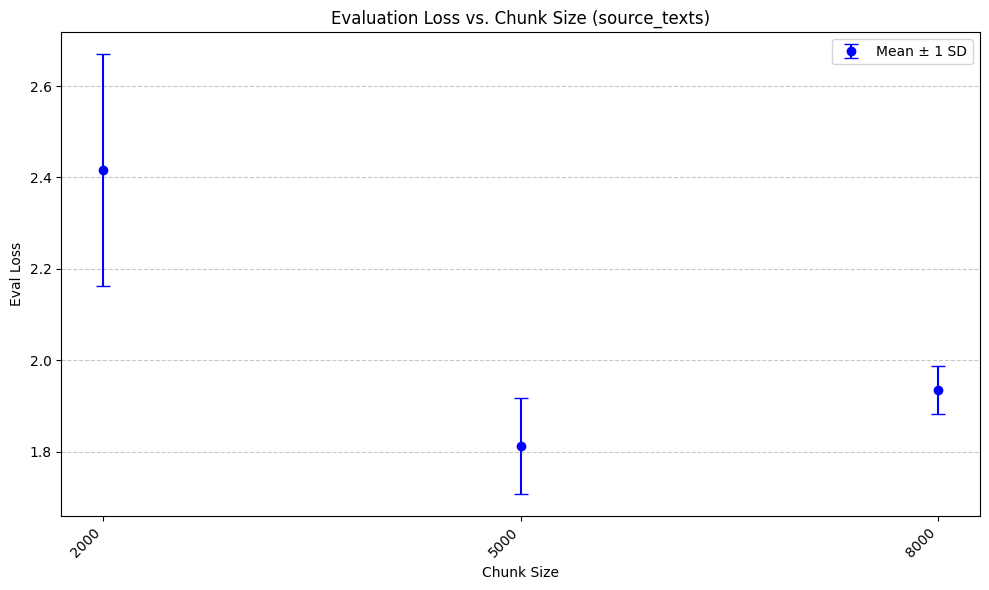

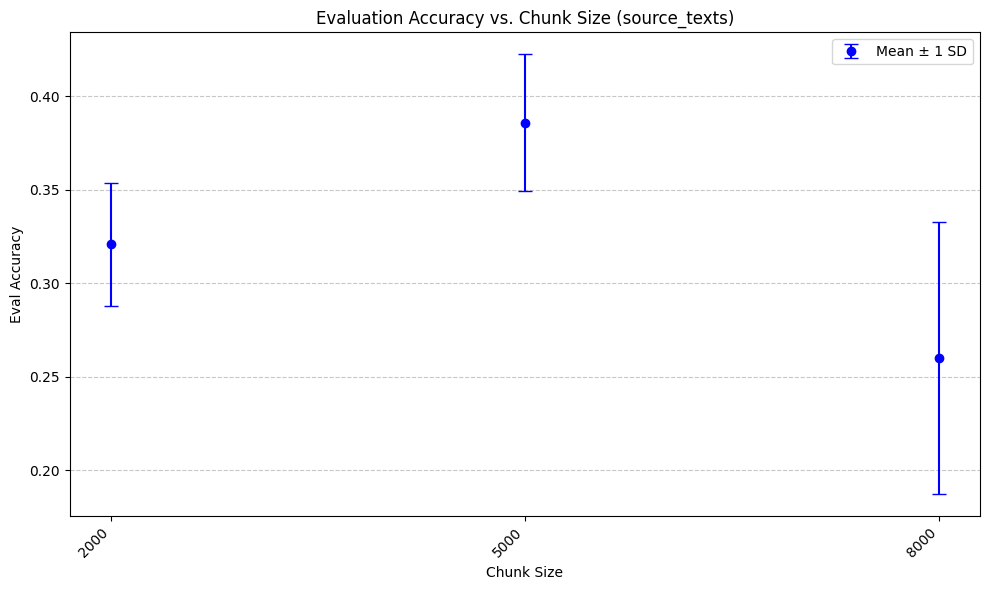

In [12]:
plot_error_bars(final_labels, final_loss_avg, final_loss_sd, title="Evaluation Loss vs. Chunk Size (source_texts)", xlabel="Chunk Size", ylabel="Eval Loss")
plot_error_bars(final_labels, final_acc_avg, final_acc_sd, title="Evaluation Accuracy vs. Chunk Size (source_texts)", xlabel="Chunk Size", ylabel="Eval Accuracy")